# Task 1: Data Preparation


In [ ]:
# Start from here to write your code for Task 1. Please also feel free to add more cells in this ipynb file.


In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import re



In [16]:
# Task 1
data_p = 'School-Age-Digital-Connectivity-A1data.csv'
data = pd.read_csv(data_p, names=['ISO3','Countries and areas','Region','Sub-region','Income Group','Total','Rural (Residence)','Urban (Residence)','Poorest (Wealth quintile)','Richest (Wealth quintile)','Data source','Time period'])
data = data.drop(0)
data = data.drop(1)

# Question 1
# error 1 duplicated rows
data.columns = data.columns.str.strip()
data.drop_duplicates(inplace=True)
print("Task 1 duplcated data, the number of row reduced to ",data.shape[0])

# error 2 incontient
data = data.applymap(lambda x: x.replace("%%", "%") if isinstance(x, str) else x)
data.loc[8, 'Time period'] = data.loc[8, 'Time period'].replace('-12', '')


# error 3 spelling mistake
valid_income_groups = ['High income (H)', 'Upper middle income (UM)', 'Lower middle income (LM)', 'Low income (L)']
invalid_income_groups = data[~data['Income Group'].isin(valid_income_groups)]['Income Group']
print("Invalid income groups:")
print(invalid_income_groups)
print("\n")

valid_region_subrigion = ['EAP', 'ECA', 'EECA','ESA','LAC','MENA','NA','SA','SSA','WCA']
invalid_region = data[~data['Region'].isin(valid_region_subrigion)]['Region']
print("Invalid region:")
print(invalid_region)
print("\n")

valid_sub_region_subrigion = ['EAP', 'ECA', 'EECA','ESA','LAC','MENA','NA','SA','SSA','WCA']
invalid_sub_region = data[~data['Sub-region'].isin(valid_sub_region_subrigion)]['Sub-region']
print("Invalid sub-region:")
print(invalid_sub_region)
print("\n")

data['Income Group'] = data['Income Group'].str.replace('Lowerr middle income \(LM\)', 'Lower middle income (LM)', regex=True)


# error 4 irregular spacing
data = data.applymap(lambda x: x.lstrip() if isinstance(x, str) else x)

# error 5 missing value
missing_values = data.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)
print("\n")
percentage_columns = ['Rural (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)']
data[percentage_columns] = data[percentage_columns].replace('%', '', regex=True).astype(float)
Column_G_Median = data['Rural (Residence)'].median()
Column_I_Median = data['Poorest (Wealth quintile)'].median()
Column_J_Median = data['Richest (Wealth quintile)'].median()
print("Median of Rural (Residence): " ,Column_G_Median)
print("Median of Poorest (Wealth quintile): ",Column_I_Median)
print("Median of Richest (Wealth quintile): ",Column_J_Median)
print("\n")
data['Rural (Residence)'].fillna(Column_G_Median, inplace=True)
data['Poorest (Wealth quintile)'].fillna(Column_I_Median, inplace=True)
data['Richest (Wealth quintile)'].fillna(Column_J_Median, inplace=True)
data[percentage_columns] = data[percentage_columns].astype(int).astype(str) + '%'
# drop irrelevant observation
data = data.drop(columns=['Data source'])
data = data.drop(columns=['ISO3'])
data = data.drop(columns=['Region'])
data = data.drop(columns=['Sub-region'])
data = data.drop(columns=['Time period'])

display(data)
data.to_csv("cleaned A1data.csv", index=False)



Task 1 duplcated data, the number of row reduced to  76
Invalid income groups:
27        Upper middle income (UM)
77       Lowerr middle income (LM)
Name: Income Group, dtype: object


Invalid region:
Series([], Name: Region, dtype: object)


Invalid sub-region:
Series([], Name: Sub-region, dtype: object)


Number of missing values in each column:
ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Rural (Residence)            2
Urban (Residence)            0
Poorest (Wealth quintile)    6
Richest (Wealth quintile)    7
Data source                  0
Time period                  0
dtype: int64


Median of Rural (Residence):  13.5
Median of Poorest (Wealth quintile):  4.0
Median of Richest (Wealth quintile):  76.0




,Countries and areas,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile)
2,Algeria,Upper middle income (UM),24%,9%,32%,1%,77%
3,Angola,Lower middle income (LM),17%,2%,24%,0%,62%
4,Armenia,Upper middle income (UM),81%,71%,88%,47%,99%
5,Bangladesh,Lower middle income (LM),37%,33%,52%,9%,76%
6,Barbados,High income (H),66%,61%,69%,10%,98%
...,...,...,...,...,...,...,...
75,Uganda,Low income (L),0%,0%,2%,0%,2%
76,Ukraine,Lower middle income (LM),71%,13%,71%,4%,76%
77,Uzbekistan,Lower middle income (LM),19%,16%,29%,1%,69%
78,Zambia,Lower middle income (LM),6%,2%,13%,0%,28%


# Task 2: Data Exploration

## Task 2.1

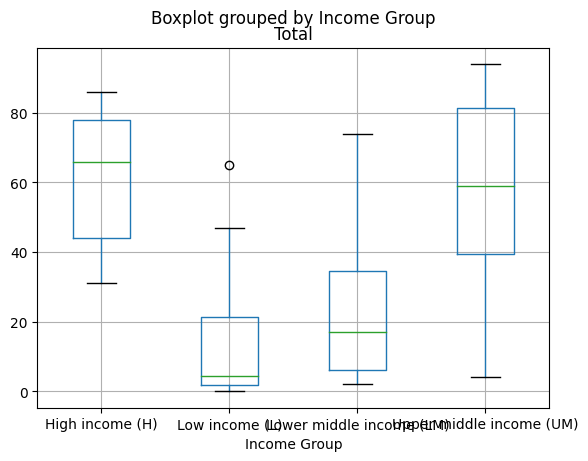

In [17]:
# Code goes after this line by adding cells
# Task 2-1
data_p = 'cleaned A1data.csv'

dataa = pd.read_csv(data_p, names=['Countries and areas','Income Group','Total','Rural (Residence)','Urban (Residence)','Poorest (Wealth quintile)','Richest (Wealth quintile)'])
data = dataa.copy()
data = data.drop(0)
data = data.drop(1)
data['Total'] = data['Total'].str.rstrip('%').astype(int)

data.dropna().boxplot(column='Total',by='Income Group')
plt.show()


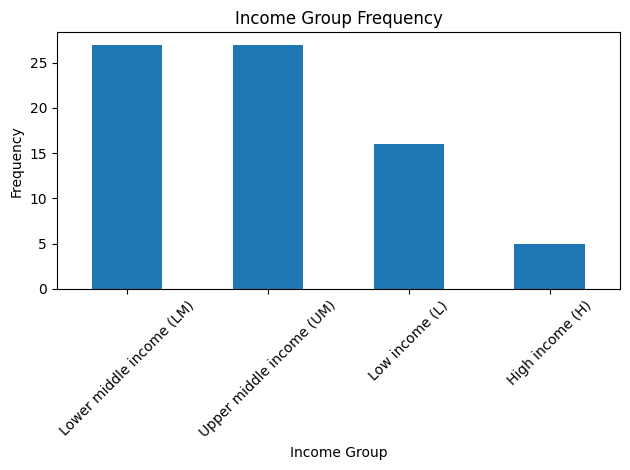

Income Group
High income (H)             61.000000
Low income (L)              13.937500
Lower middle income (LM)    22.703704
Upper middle income (UM)    57.777778
Name: Total, dtype: float64


In [18]:
#bar chart
income_group_counts = data['Income Group'].value_counts()
income_group_counts.plot(kind='bar')

plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Income Group Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
# find median
median_total_by_Income = data.groupby('Income Group')['Total'].mean()

print(median_total_by_Income)

## Task 2.2

In [19]:
# Code goes after this line by adding cells
# Task 2-2

copy_data = data.copy()

copy_data = copy_data[copy_data['Rural (Residence)'].notna()]
copy_data['Rural (Residence)'] = copy_data['Rural (Residence)'].str.rstrip('%').astype(float)
median_rural = copy_data['Rural (Residence)'].median()

copy_data = copy_data[copy_data['Urban (Residence)'].notna()]
copy_data['Urban (Residence)'] = copy_data['Urban (Residence)'].str.rstrip('%').astype(float)
median_urban = copy_data['Urban (Residence)'].median()



top_rural_countries = copy_data.nlargest(10, 'Rural (Residence)')[['Countries and areas', 'Rural (Residence)']]

top_urban_countries = copy_data.nlargest(10, 'Urban (Residence)')[['Countries and areas', 'Urban (Residence)']]

# Display the results
print("Median of percentage of school-age children with internet connection for Residence (Rural):")
print(median_rural)

print("\nMedian of percentage of school-age children with internet connection for Residence (Urban):")
print(median_urban)

print("\nTop 10 countries with highest percentage for Residence (Rural):")
print(top_rural_countries)

print("\nTop 10 countries with highest percentage for Residence (Urban):")
print(top_urban_countries)


Median of percentage of school-age children with internet connection for Residence (Rural):
13.0

Median of percentage of school-age children with internet connection for Residence (Urban):
44.0

Top 10 countries with highest percentage for Residence (Rural):
   Countries and areas  Rural (Residence)
23  Dominican Republic              100.0
57              Serbia               91.0
65     North Macedonia               90.0
67               Tonga               90.0
34               Japan               83.0
53  Russian Federation               79.0
47          Montenegro               74.0
26             Georgia               72.0
3              Armenia               71.0
15               Chile               70.0

Top 10 countries with highest percentage for Residence (Urban):
   Countries and areas  Urban (Residence)
57              Serbia               97.0
53  Russian Federation               94.0
67               Tonga               94.0
26             Georgia               93.0
65 

## Task 2.3

In [20]:
# Code goes after this line by adding cells
 # task 2-3

copy_data = data.copy()

copy_data = copy_data[copy_data['Poorest (Wealth quintile)'].notna()]
copy_data = copy_data[copy_data['Richest (Wealth quintile)'].notna()]
copy_data['Poorest (Wealth quintile)'] = copy_data['Poorest (Wealth quintile)'].str.rstrip('%').astype(float)
copy_data['Richest (Wealth quintile)'] = copy_data['Richest (Wealth quintile)'].str.rstrip('%').astype(float)

um_data = copy_data[copy_data['Income Group'] == 'Upper middle income (UM)']

percentage_columns = ['Poorest (Wealth quintile)', 'Richest (Wealth quintile)']

statistics = um_data[percentage_columns].describe()

print("Poorest (Wealth quintile) statistics:")
print(statistics.loc[['mean', '50%', 'std'], 'Poorest (Wealth quintile)'])

print("\n'Richest (Wealth quintile) statistics:")
print(statistics.loc[['mean', '50%', 'std'], 'Richest (Wealth quintile)'])



Poorest (Wealth quintile) statistics:
mean    34.444444
50%     32.000000
std     29.599030
Name: Poorest (Wealth quintile), dtype: float64

'Richest (Wealth quintile) statistics:
mean    84.481481
50%     95.000000
std     23.624255
Name: Richest (Wealth quintile), dtype: float64
